This assignment is to help us better understand your data analysis skills and the ability to come up with a report.

This dataset is the fuel economy data from the Vehicle Certification Agency (VCA) for the years 2000-2014.

Please draft a report in English about your top 5 findings/insights, such as the number of cars being manufactured or in each fuel type across the 15 years,  and make a complete report.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/portfolio/Perfect Corporation/fuel_economy_data.csv', encoding='utf-8', low_memory=False)

In [4]:
df.set_index(df.index, inplace=True)

In [5]:
df.head()

,year,Euro Standard,Manufacturer,Model,Description,Transmission,Engine Capacity,Fuel Type,Metric Urban (cold),Metric Extra-urban,...,MPG Imperial Combined,CO2 g/km,Fuel Cost 6000 Miles,Euro Standard.1,Noise Level dB(A),Emissions CO,Emissions HC+NOx,Emissions HC,Emissions NOx,Emissions Particulates
0,2000,EURO 2,VOLVO,New V70 Model Year 2001,2.5 D,M5,2461,Diesel,8.8,5.1,...,43.5,172.0,502.0,II,74,0.23,0.7,0.073,0,0.086
1,2000,EURO 2,VOLVO,S80 Model Year 2001,2.5 D,M5,2461,Diesel,8.8,4.9,...,44.1,169.0,495.0,II,74,0.264,0.732,0,0,0.073
2,2000,EURO 2,VOLVO,S80 Model Year 2001,2.5 D,A4,2461,Diesel,11.0,5.4,...,38.2,196.0,571.0,II,74,0.16,0.715,0,0,0.076
3,2000,EURO 3,VOLVO,S/V40 Model Year 2001,1.9 D (102 bhp),M5,1870,Diesel,7.4,4.2,...,52.3,142.0,417.0,III,72,0.16,0.43,0,0.42,0.040
4,2000,EURO 3,VOLVO,S/V40 Model Year 2001,1.9 D (115 bhp),M5,1870,Diesel,7.4,4.2,...,52.3,142.0,417.0,III,73,0.27,0.38,0,0.35,0.030


In [6]:
df.columns

Index(['year', 'Euro Standard', 'Manufacturer', 'Model', 'Description',
       'Transmission', 'Engine Capacity', 'Fuel Type', 'Metric Urban (cold)',
       'Metric Extra-urban', 'Metric Combined', 'Imperial (cold)',
       'Imperial Extra-urban', 'MPG Imperial Combined', 'CO2 g/km',
       'Fuel Cost 6000 Miles', 'Euro Standard.1', 'Noise Level dB(A)',
       'Emissions CO', 'Emissions HC+NOx', 'Emissions HC', 'Emissions NOx',
       'Emissions Particulates'],
      dtype='object')

In [7]:
df.shape

(48071, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48071 entries, 0 to 48070
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    48071 non-null  int64  
 1   Euro Standard           48071 non-null  object 
 2   Manufacturer            48071 non-null  object 
 3   Model                   48071 non-null  object 
 4   Description             48071 non-null  object 
 5   Transmission            48053 non-null  object 
 6   Engine Capacity         48058 non-null  object 
 7   Fuel Type               48071 non-null  object 
 8   Metric Urban (cold)     48039 non-null  float64
 9   Metric Extra-urban      48039 non-null  float64
 10  Metric Combined         48058 non-null  float64
 11  Imperial (cold)         48039 non-null  float64
 12  Imperial Extra-urban    48039 non-null  float64
 13  MPG Imperial Combined   48058 non-null  float64
 14  CO2 g/km                48071 non-null

In [9]:
df.describe()

,year,Metric Urban (cold),Metric Extra-urban,Metric Combined,Imperial (cold),Imperial Extra-urban,MPG Imperial Combined,CO2 g/km,Fuel Cost 6000 Miles,Emissions Particulates
count,48071.000000,48039.00000,48039.000000,48058.000000,48039.000000,48039.000000,48058.000000,48071.000000,36986.000000,12588.000000
mean,2007.762352,10.24596,6.049749,7.583490,31.432383,49.949570,40.972825,186.791139,1209.692888,0.095358
std,4.065756,4.01119,1.682438,2.520584,11.479287,12.588065,12.553215,57.197338,565.753598,0.302860
min,2000.000000,2.90000,2.900000,1.200000,6.800000,5.400000,10.200000,0.000000,0.000000,0.000000
25%,2005.000000,7.40000,4.800000,5.800000,23.300000,40.900000,31.700000,148.000000,727.360000,0.001000
50%,2008.000000,9.50000,5.800000,7.200000,29.700000,48.700000,39.200000,177.000000,1184.074419,0.022000
75%,2011.000000,12.10000,6.900000,8.900000,38.200000,58.900000,48.700000,215.000000,1544.544578,0.040000
max,2014.000000,41.20000,25.700000,44.000000,555.400000,97.400000,235.400000,590.000000,6044.000000,8.000000


In [10]:
# check missing values
df.isnull().sum()

,0
year,0
Euro Standard,0
Manufacturer,0
Model,0
Description,0
Transmission,18
Engine Capacity,13
Fuel Type,0
Metric Urban (cold),32
Metric Extra-urban,32


In [11]:
# Standardize column names
df.columns = df.columns.str.replace(r"[()]", "", regex=True).str.replace(" ", "_")

In [12]:
df.columns

Index(['year', 'Euro_Standard', 'Manufacturer', 'Model', 'Description',
       'Transmission', 'Engine_Capacity', 'Fuel_Type', 'Metric_Urban_cold',
       'Metric_Extra-urban', 'Metric_Combined', 'Imperial_cold',
       'Imperial_Extra-urban', 'MPG_Imperial_Combined', 'CO2_g/km',
       'Fuel_Cost_6000_Miles', 'Euro_Standard.1', 'Noise_Level_dBA',
       'Emissions_CO', 'Emissions_HC+NOx', 'Emissions_HC', 'Emissions_NOx',
       'Emissions_Particulates'],
      dtype='object')

In [13]:
# Drop the duplicate "Euro Standard.1" column
df.drop(columns=["Euro_Standard.1","Emissions_HC+NOx","Emissions_HC","Emissions_NOx","Emissions_Particulates"], inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48071 entries, 0 to 48070
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   48071 non-null  int64  
 1   Euro_Standard          48071 non-null  object 
 2   Manufacturer           48071 non-null  object 
 3   Model                  48071 non-null  object 
 4   Description            48071 non-null  object 
 5   Transmission           48053 non-null  object 
 6   Engine_Capacity        48058 non-null  object 
 7   Fuel_Type              48071 non-null  object 
 8   Metric_Urban_cold      48039 non-null  float64
 9   Metric_Extra-urban     48039 non-null  float64
 10  Metric_Combined        48058 non-null  float64
 11  Imperial_cold          48039 non-null  float64
 12  Imperial_Extra-urban   48039 non-null  float64
 13  MPG_Imperial_Combined  48058 non-null  float64
 14  CO2_g/km               48071 non-null  float64
 15  Fu

In [14]:
# Convert "Engine_Capacity", "Noice_Level_dBA", emissions columns to numeric, setting errors to NaN if conversion fails
df["Engine_Capacity"] = pd.to_numeric(df["Engine_Capacity"], errors="coerce")
df["Noise_Level_dBA"] = pd.to_numeric(df["Noise_Level_dBA"], errors="coerce")
df["Emissions_CO"] = pd.to_numeric(df["Emissions_CO"], errors="coerce")

print(df.dtypes)

year                       int64
Euro_Standard             object
Manufacturer              object
Model                     object
Description               object
Transmission              object
Engine_Capacity          float64
Fuel_Type                 object
Metric_Urban_cold        float64
Metric_Extra-urban       float64
Metric_Combined          float64
Imperial_cold            float64
Imperial_Extra-urban     float64
MPG_Imperial_Combined    float64
CO2_g/km                 float64
Fuel_Cost_6000_Miles     float64
Noise_Level_dBA          float64
Emissions_CO             float64
dtype: object


In [15]:
print(df["Noise_Level_dBA"].unique())

[7.400e+01 7.200e+01 7.300e+01 7.100e+01 7.000e+01 6.700e+01 6.900e+01
 6.800e+01 3.600e-01 9.500e-02 2.700e-01 4.900e-02 9.300e-02 1.740e-01
 1.040e-01 8.800e-02 1.460e-01 2.780e-01 4.800e-02 1.080e-01 8.000e-02
 1.220e-01 1.480e-01 1.520e-01 2.230e-01 7.900e-02 1.150e-01 1.210e-01
 1.420e-01 1.530e-01 3.010e-01 2.350e-01 1.990e-01 1.880e-01 8.500e-02
 2.070e-01 9.600e-02 3.400e-02 2.320e-01 4.360e-01 2.830e-01 5.000e-01
 5.880e-01 3.690e-01 4.800e-01 1.560e-01 1.260e-01 2.160e-01 1.930e-01
 2.020e-01 9.100e-02 1.660e-01 2.510e-01 8.900e-02 1.550e-01 1.940e-01
 4.700e-02 1.070e-01 3.200e-02 8.300e-02 3.200e-01 2.310e-01 1.540e-01
 1.320e-01 1.750e-01 1.440e-01 4.200e-01 4.380e-01 5.480e-01 4.670e-01
 3.100e-02 8.400e-02 3.800e-02 8.600e-02 1.340e-01 1.860e-01 1.630e-01
 1.950e-01 1.600e-01 9.700e-02 1.110e-01 7.600e-02 1.200e-01 3.110e-01
 2.360e-01 7.600e+01 7.500e+01 7.350e+01 3.970e-01 7.250e+01 7.050e+01
 4.500e-01 4.340e-01 2.090e-01 2.170e-01 2.930e-01 7.700e-01 5.140e-01
 1.370

In [16]:
df['Noise_Level_dBA'] = df['Noise_Level_dBA'].apply(lambda x: x * 100 if x < 1 else x)
median_noise = df[df['Noise_Level_dBA'] >= 60]['Noise_Level_dBA'].median()
df.loc[df['Noise_Level_dBA'] < 55, 'Noise_Level_dBA'] = median_noise

In [17]:
# Check for missing values
print(df.isnull().sum())

year                         0
Euro_Standard                0
Manufacturer                 0
Model                        0
Description                  0
Transmission                18
Engine_Capacity             14
Fuel_Type                    0
Metric_Urban_cold           32
Metric_Extra-urban          32
Metric_Combined             13
Imperial_cold               32
Imperial_Extra-urban        32
MPG_Imperial_Combined       13
CO2_g/km                     0
Fuel_Cost_6000_Miles     11085
Noise_Level_dBA              7
Emissions_CO               802
dtype: int64


In [18]:
# Drop unnecessary columns
df.dropna(subset=["Transmission", "Engine_Capacity", "Metric_Urban_cold",
                  "Metric_Extra-urban", "Metric_Combined",
                  "Imperial_cold", "Imperial_Extra-urban", "MPG_Imperial_Combined", "Noise_Level_dBA"], inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 48031 entries, 0 to 48070
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   48031 non-null  int64  
 1   Euro_Standard          48031 non-null  object 
 2   Manufacturer           48031 non-null  object 
 3   Model                  48031 non-null  object 
 4   Description            48031 non-null  object 
 5   Transmission           48031 non-null  object 
 6   Engine_Capacity        48031 non-null  float64
 7   Fuel_Type              48031 non-null  object 
 8   Metric_Urban_cold      48031 non-null  float64
 9   Metric_Extra-urban     48031 non-null  float64
 10  Metric_Combined        48031 non-null  float64
 11  Imperial_cold          48031 non-null  float64
 12  Imperial_Extra-urban   48031 non-null  float64
 13  MPG_Imperial_Combined  48031 non-null  float64
 14  CO2_g/km               48031 non-null  float64
 15  Fuel_Co

In [19]:
# Fill missing values with the median
df["Emissions_CO"].fillna(df["Emissions_CO"].median(), inplace=True)

# Confirm missing values are handled
print(df.isnull().sum())

year                         0
Euro_Standard                0
Manufacturer                 0
Model                        0
Description                  0
Transmission                 0
Engine_Capacity              0
Fuel_Type                    0
Metric_Urban_cold            0
Metric_Extra-urban           0
Metric_Combined              0
Imperial_cold                0
Imperial_Extra-urban         0
MPG_Imperial_Combined        0
CO2_g/km                     0
Fuel_Cost_6000_Miles     11053
Noise_Level_dBA              0
Emissions_CO                 0
dtype: int64


<ipython-input-19-f18aeec5fd4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Emissions_CO"].fillna(df["Emissions_CO"].median(), inplace=True)


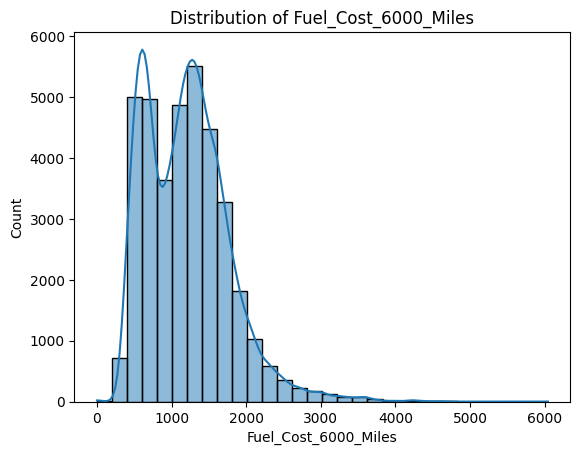

In [20]:
sns.histplot(df['Fuel_Cost_6000_Miles'], bins=30, kde=True)
plt.title("Distribution of Fuel_Cost_6000_Miles")
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

feature = ['Metric_Combined']

df_notnull = df.dropna(subset=['Fuel_Cost_6000_Miles'])
df_null = df[df['Fuel_Cost_6000_Miles'].isnull()]

model = LinearRegression()
model.fit(df_notnull[feature], df_notnull['Fuel_Cost_6000_Miles'])

df.loc[df['Fuel_Cost_6000_Miles'].isnull(), 'Fuel_Cost_6000_Miles'] = model.predict(df_null[feature])

print(df['Fuel_Cost_6000_Miles'].isnull().sum())

0


In [22]:
print(df.isnull().sum())
print(df.shape)
print(df.head())

year                     0
Euro_Standard            0
Manufacturer             0
Model                    0
Description              0
Transmission             0
Engine_Capacity          0
Fuel_Type                0
Metric_Urban_cold        0
Metric_Extra-urban       0
Metric_Combined          0
Imperial_cold            0
Imperial_Extra-urban     0
MPG_Imperial_Combined    0
CO2_g/km                 0
Fuel_Cost_6000_Miles     0
Noise_Level_dBA          0
Emissions_CO             0
dtype: int64
(48031, 18)
   year Euro_Standard Manufacturer                    Model      Description  \
0  2000        EURO 2        VOLVO  New V70 Model Year 2001            2.5 D   
1  2000        EURO 2        VOLVO      S80 Model Year 2001            2.5 D   
2  2000        EURO 2        VOLVO      S80 Model Year 2001            2.5 D   
3  2000        EURO 3        VOLVO    S/V40 Model Year 2001  1.9 D (102 bhp)   
4  2000        EURO 3        VOLVO    S/V40 Model Year 2001  1.9 D (115 bhp)   

  Transm

In [23]:
df['Transmission'].unique()

array(['M5', 'A4', 'A5', 'M6', 'A5 ', 'A6', '5MT', '6MT', '6AT', '5AT',
       'A6-AWD', 'QM6', 'D6', 'D7', 'QD7', 'QM5', 'QA5', 'M', 'QA6',
       'QD6', 'A8', 'MTA', 'CVT', 'MTA5', 'MTA6', 'ET5', 'A5-AWD', 'M5x2',
       'A4x2', 'Hybrid', 'A5x2', 'SAT5', 'Electric', 'Multi5', 'E-CVT',
       'M6x2', 'A6x2', 'MultiDrive', 'Multi6', 'MultiDriv', '5MTx2',
       '4ATx2', '3AT', '4AT', '5A/Tx2', '5 AMT', 'SM6', 'S/A6', 'SAT6',
       'A/SAT5', 'AV', 'M5NE', 'M5N', 'A4L', 'A4NE', 'M4', 'A7', 'M5/s',
       'A3', 'M3', 'MT', 'AT', 'M7', 'AMT5', 'AMT6', '7SP. SSG', 'ASM',
       'A8-AWD', 'M6-AWD', 'A9-AWD', 'M6/S6', 'S6', 'SAT 5', 'DCT6',
       '4SS', 'SS5', '6AMT', 'i-SHIFT', 'A', 'M5 or ASM', 'ASM  ', 'M8',
       '7MT', 'SMG 7', 'DCT7', 'QA8', 'FM5', 'FA4', 'QM', 'QA', 'FA5',
       'QD8'], dtype=object)

In [24]:
# Original Value	Category
# M, M5, M6, M7, M8, MT, 5MT, 6MT	Manual (MT)
# A, AT, A5, A6, A7, A8, A9, SAT, SMG	Automatic (AT)
# CVT, E-CVT	Continuously Variable Transmission (CVT)
# DCT6, DCT7	Dual-Clutch Transmission (DCT)
# Hybrid, Electric	Hybrid/Electric
# A6-AWD, M6-AWD, 5MTx2	AWD/4WD Variants

def categorize_transmission(trans):
    if 'M' in trans and 'AT' not in trans:
        return 'Manual'
    elif 'A' in trans or 'SAT' in trans:
        return 'Automatic'
    elif 'CVT' in trans:
        return 'CVT'
    elif 'DCT' in trans:
        return 'DCT'
    elif 'Hybrid' in trans or 'Electric' in trans:
        return 'Hybrid/Electric'
    else:
        return 'Other'

df['Transmission_Type'] = df['Transmission'].apply(categorize_transmission)

In [25]:
cleaned_file_path = '/content/drive/MyDrive/portfolio/Perfect Corporation/fuel_economy_data_cleaned.csv'
df.to_csv(cleaned_file_path, index=False, encoding="utf-8")

In [26]:
df.columns

Index(['year', 'Euro_Standard', 'Manufacturer', 'Model', 'Description',
       'Transmission', 'Engine_Capacity', 'Fuel_Type', 'Metric_Urban_cold',
       'Metric_Extra-urban', 'Metric_Combined', 'Imperial_cold',
       'Imperial_Extra-urban', 'MPG_Imperial_Combined', 'CO2_g/km',
       'Fuel_Cost_6000_Miles', 'Noise_Level_dBA', 'Emissions_CO',
       'Transmission_Type'],
      dtype='object')

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Drop unnecessary columns
drop_columns = [
    "year", "Euro_Standard", "Model", "Description", "Transmission", "Metric_Urban_cold", "Metric_Extra-urban", "Imperial_cold",
    "Imperial_Extra-urban", "MPG_Imperial_Combined", "Emissions_CO"
]

df_cleaned = df.drop(columns=drop_columns, errors="ignore")

In [28]:
df_cleaned.columns

Index(['Manufacturer', 'Engine_Capacity', 'Fuel_Type', 'Metric_Combined',
       'CO2_g/km', 'Fuel_Cost_6000_Miles', 'Noise_Level_dBA',
       'Transmission_Type'],
      dtype='object')

In [29]:
df_cleaned['Manufacturer'].unique()

array(['VOLVO', 'VOLKSWAGEN C.V.', 'VOLKSWAGEN', 'VAUXHALL', 'TOYOTA',
       'TATA', 'SUZUKI', 'SUBARU', 'SSANGYONG', 'SMART', 'smart', 'SKODA',
       'SEAT', 'SAAB', 'ROLLS ROYCE MOTOR CARS', 'RENAULT', 'PROTON',
       'PORSCHE', 'PEUGEOT', 'PERODUA', 'NISSAN', 'MORGAN MOTOR COMPANY',
       'MITSUBISHI', 'MINI', 'MICRO COMPACT CAR (MCC)', 'MG ROVER GROUP',
       'MG MOTORS UK', 'METROCAB', 'MERCEDES-BENZ', 'MCLAREN', 'MAZDA',
       'MASERATI', 'LTI', 'LOTUS', 'LEXUS', 'LAND ROVER', 'LAMBORGHINI',
       'KIA', 'JAGUAR CARS', 'JAGUAR', 'ISUZU', 'INFINITI', 'HYUNDAI',
       'HUMMER', 'HONDA', 'FORD', 'FIAT', 'FERRARI', 'DODGE', 'DAIHATSU',
       'DAEWOO CARS', 'DACIA', 'CORVETTE', 'CITROEN', 'CHRYSLER JEEP',
       'CHEVROLET', 'CADILLAC', 'BMW', 'BENTLEY MOTORS', 'AUDI',
       'ASTON MARTIN LAGONDA', 'ALFA ROMEO', 'ABARTH'], dtype=object)

In [30]:
manufacturer_mapping = {
    # Luxury Brands
    "MERCEDES-BENZ": "Luxury", "BMW": "Luxury", "AUDI": "Luxury",
    "LEXUS": "Luxury", "JAGUAR": "Luxury", "JAGUAR CARS": "Luxury",
    "INFINITI": "Luxury", "BENTLEY MOTORS": "Luxury", "ROLLS ROYCE MOTOR CARS": "Luxury",
    "ASTON MARTIN LAGONDA": "Luxury", "MASERATI": "Luxury", "CADILLAC": "Luxury",
    "LAND ROVER": "Luxury",

    # Budget Brands
    "TOYOTA": "Budget", "HONDA": "Budget", "KIA": "Budget", "HYUNDAI": "Budget",
    "NISSAN": "Budget", "SUZUKI": "Budget", "SUBARU": "Budget", "DAIHATSU": "Budget",
    "SSANGYONG": "Budget", "DACIA": "Budget", "PROTON": "Budget", "PERODUA": "Budget",
    "DAEWOO CARS": "Budget",

    # Mid-Tier Brands
    "FORD": "Mid-Tier", "VOLKSWAGEN": "Mid-Tier", "VOLKSWAGEN C.V.": "Mid-Tier",
    "VAUXHALL": "Mid-Tier", "PEUGEOT": "Mid-Tier", "RENAULT": "Mid-Tier",
    "CITROEN": "Mid-Tier", "FIAT": "Mid-Tier", "SEAT": "Mid-Tier", "SKODA": "Mid-Tier",
    "VOLVO": "Mid-Tier", "MINI": "Mid-Tier", "CHEVROLET": "Mid-Tier", "CHRYSLER JEEP": "Mid-Tier",
    "ISUZU": "Mid-Tier", "DODGE": "Mid-Tier", "MITSUBISHI": "Mid-Tier",
    "SAAB": "Mid-Tier","MAZDA": "Mid-Tier",

    # Performance Brands
    "FERRARI": "Performance", "LAMBORGHINI": "Performance", "MCLAREN": "Performance",
    "PORSCHE": "Performance", "CORVETTE": "Performance", "LOTUS": "Performance",
    "ALFA ROMEO": "Performance", "ABARTH": "Performance",

    # EV Brands
    "SMART": "EV", "smart": "EV", "MICRO COMPACT CAR (MCC)": "EV",
}

In [31]:
df_cleaned["Manufacturer_Category"] = df_cleaned["Manufacturer"].map(manufacturer_mapping).fillna("Other")
df_cleaned = df_cleaned.drop(columns=["Manufacturer"])

In [32]:
# Identify categorical and numerical features
categorical_features = ["Manufacturer_Category", "Fuel_Type", "Transmission_Type"]
numerical_features = [
    "Engine_Capacity", "Metric_Combined", "CO2_g/km", "Fuel_Cost_6000_Miles", "Noise_Level_dBA"
]

# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print(df_encoded.head())

   Engine_Capacity  Metric_Combined  CO2_g/km  Fuel_Cost_6000_Miles  \
0         0.104324         0.080882  0.181996              0.083058   
1         0.104324         0.078431  0.176125              0.081899   
2         0.104324         0.102941  0.228963              0.094474   
3         0.079271         0.053922  0.123288              0.068994   
4         0.079271         0.053922  0.123288              0.068994   

   Noise_Level_dBA  Manufacturer_Category_EV  Manufacturer_Category_Luxury  \
0         0.458937                     False                         False   
1         0.458937                     False                         False   
2         0.458937                     False                         False   
3         0.410628                     False                         False   
4         0.434783                     False                         False   

   Manufacturer_Category_Mid-Tier  Manufacturer_Category_Other  \
0                            True     

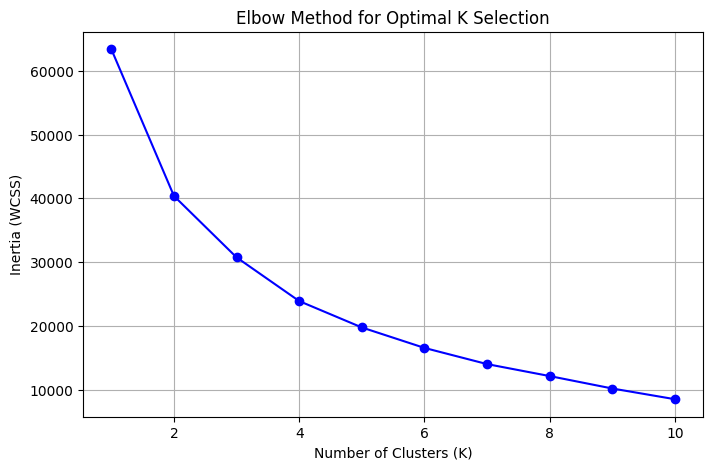

In [33]:
from sklearn.cluster import KMeans

# Apply the Elbow Method to determine the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K Selection")
plt.grid(True)
plt.show()

In [34]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_encoded["Cluster"] = kmeans.fit_predict(df_encoded)

print(df_encoded.head())
print(df_encoded["Cluster"].value_counts())

   Engine_Capacity  Metric_Combined  CO2_g/km  Fuel_Cost_6000_Miles  \
0         0.104324         0.080882  0.181996              0.083058   
1         0.104324         0.078431  0.176125              0.081899   
2         0.104324         0.102941  0.228963              0.094474   
3         0.079271         0.053922  0.123288              0.068994   
4         0.079271         0.053922  0.123288              0.068994   

   Noise_Level_dBA  Manufacturer_Category_EV  Manufacturer_Category_Luxury  \
0         0.458937                     False                         False   
1         0.458937                     False                         False   
2         0.458937                     False                         False   
3         0.410628                     False                         False   
4         0.434783                     False                         False   

   Manufacturer_Category_Mid-Tier  Manufacturer_Category_Other  \
0                            True     

In [35]:
cluster_summary = df_encoded.groupby("Cluster").mean()
print(cluster_summary)

         Engine_Capacity  Metric_Combined  CO2_g/km  Fuel_Cost_6000_Miles  \
Cluster                                                                     
0               0.079707         0.116200  0.214716              0.189397   
1               0.099974         0.081278  0.182750              0.189466   
2               0.082046         0.068719  0.155223              0.170928   
3               0.108634         0.145672  0.270763              0.220377   

         Noise_Level_dBA  Manufacturer_Category_EV  \
Cluster                                              
0               0.410858                  0.000000   
1               0.409989                  0.002048   
2               0.410319                  0.002190   
3               0.415143                  0.022590   

         Manufacturer_Category_Luxury  Manufacturer_Category_Mid-Tier  \
Cluster                                                                 
0                            0.000000                        1.000

In [36]:
# Set display options to show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.float_format", "{:.6f}".format)

print(cluster_summary)

         Engine_Capacity  Metric_Combined  CO2_g/km  Fuel_Cost_6000_Miles  Noise_Level_dBA  Manufacturer_Category_EV  Manufacturer_Category_Luxury  Manufacturer_Category_Mid-Tier  Manufacturer_Category_Other  Manufacturer_Category_Performance  Fuel_Type_Diesel  Fuel_Type_Diesel Electric  Fuel_Type_Diesel/Electric  Fuel_Type_LPG  Fuel_Type_Petrol  Fuel_Type_Petrol / E85  Fuel_Type_Petrol Electric  Fuel_Type_Petrol Hybrid  Transmission_Type_CVT  Transmission_Type_DCT  Transmission_Type_Hybrid/Electric  Transmission_Type_Manual  Transmission_Type_Other
Cluster                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [37]:
cleaned_file_path = '/content/drive/MyDrive/portfolio/Perfect Corporation/fuel_economy_data_cleaned_segmented.csv'
df_encoded.to_csv(cleaned_file_path, index=False, encoding="utf-8")

In [38]:
df_encoded_to_merge = df_encoded.drop(columns=["Engine_Capacity", "CO2_g/km", "Metric_Combined", "Fuel_Cost_6000_Miles", "Noise_Level_dBA"])
df_merged = df.merge(df_encoded_to_merge, left_index=True, right_index=True, how="inner")

In [39]:
cleaned_file_path = '/content/drive/MyDrive/portfolio/Perfect Corporation/fuel_economy_data_merged.csv'
df_merged.to_csv(cleaned_file_path, index=False, encoding="utf-8")

In [40]:
df_merged.columns

Index(['year', 'Euro_Standard', 'Manufacturer', 'Model', 'Description', 'Transmission', 'Engine_Capacity', 'Fuel_Type', 'Metric_Urban_cold', 'Metric_Extra-urban', 'Metric_Combined', 'Imperial_cold', 'Imperial_Extra-urban', 'MPG_Imperial_Combined', 'CO2_g/km', 'Fuel_Cost_6000_Miles', 'Noise_Level_dBA', 'Emissions_CO', 'Transmission_Type', 'Manufacturer_Category_EV', 'Manufacturer_Category_Luxury', 'Manufacturer_Category_Mid-Tier', 'Manufacturer_Category_Other', 'Manufacturer_Category_Performance', 'Fuel_Type_Diesel', 'Fuel_Type_Diesel Electric', 'Fuel_Type_Diesel/Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Fuel_Type_Petrol / E85', 'Fuel_Type_Petrol Electric', 'Fuel_Type_Petrol Hybrid', 'Transmission_Type_CVT', 'Transmission_Type_DCT', 'Transmission_Type_Hybrid/Electric', 'Transmission_Type_Manual', 'Transmission_Type_Other', 'Cluster'], dtype='object')